## Домашнее задание 2. Tiny ImageNet Challenge (20 баллов + 6 баллов + бонус)

В этом задании Вам предстоит обучить свёрточную нейросеть для решения задачи мультиклассовой классификации на датасете [Tiny ImageNet](https://www.kaggle.com/c/tiny-imagenet) (200 классов, по 500 изображений на класс в трейне и по 50 в валидации и тесте).

## Критерии оценки

* 3 балла за отчет. Без отчёта с графиками лосса и метрики (``accuracy@1``) на обучении работа **не принимается!**
* 3 балла за использование **интерактивного** (не изобретайте велосипед с помощью `plt.plot`) инструмента для просмотра прогресса, например, TensorBoard или Wandb.    
    *В Wandb также можно писать отчёты по вашим данным, попробуйте, это очень экономит время.*
* `[7;14]+bonus(accuracy@1_test)` баллов за точность на **тестовом** наборе: 7 за достижение нижнего порога, далее линейно до верхнего (14). Bonus описан ниже в графике.
* Bonus за первые три места (5/3/1)


## Объяснение оценок

* *Тест*: это часть набора данных, идентичная валидации, но лейблы известны только нам (не пытайтесь копаться в ImageNet-1K).
* *Как отправить*:
   * Не меняйте этот ноутбук, ваш код должен отработать в нём для корректной проверки инференса. Обучать можно как угодно, например, в нём же с флагом `DO_TRAIN=True`, в своём ноутбуке или из консоли.
   * После того, как вы обучили свою сеть, [сохраните веса](https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html) в «*checkpoint.pth*» с помощью `model.state_dict()` и ` torch.save()`.
   * Установите `DO_TRAIN = False`, нажмите «Перезапустить и запустить все ячейки» и убедитесь, что точность проверки на валидации рассчитана правильно.
   * Вычислите контрольную сумму MD5 для «*checkpoint.pth*» (например, запустите `!md5sum checkpoint.pth`) и вставьте ее в ваш «*solution.py*» (`get_checkpoint_metadata()`). Вы будете оштрафованы, если эта контрольная сумма не будет соответствовать отправленному вами файлу.
   * Загрузите «*checkpoint.pth*» на Google Диск, скопируйте на него ссылку, доступную только для просмотра, и вставьте ее также в «*solution.py*».

* *Отчет*: PDF, свободная форма (можно написать в Markdown или .ipynb, главное сконвертировать в PDF в конце; отчёт в Wandb просто присылайте ссылкой), следует упомянуть:
   * Ваша история настроек и улучшений. Как вы начинали, что искали. (*Я проанализировал те и эти документы/источники/репорты/статьи. Я попробовал то и это, чтобы адаптировать их к моей задаче. ...*)
   * Какие архитектуры вы пробовали? Какие из них не сработали и почему, по Вашему мнению? Какую выбрали на финальный сабмит и почему?
   * То же самое касается метода обучения (batch size, алгоритм оптимизации, количество итераций...): что и почему?
   * То же самое касается методов предотвращения переобучения (регуляризации). Какие из них вы пробовали? Каковы были их последствия и можете ли вы объяснить, почему?
   * **Самое главное**: вы получили глубокие знания. Можете ли вы отрефлексировать и привести несколько примеров того, как опыт этого упражнения повлияет на ваше обучение будущих нейронных сетей? (хитрости, эвристики, выводы, наблюдения)
   * **Перечислите и сошлитесь на все внешние источники кода, если вы их использовали**.
* *Инструмент логгирования*: дополните отчет скриншотами графиков точности и лосса (на трейне и на валидации) с течением времени.

## Ограничения

* Никаких претрейнов.
* Не увеличивайте изображения (например, не изменяйте их размер до $224 \times 224$ или $256 \times 256$).

## Советы

* **Одно изменение за раз**: не тестируйте несколько новых вещей одновременно (если вы не очень уверены, что они будут работать). Обучите модель, внесите одно изменение, обучите снова.
* Много гуглите: постарайтесь изобрести как можно меньше велосипедов. Черпайте вдохновение из туториалов PyTorch, GitHub, блогов...
* Используйте графический процессор.
* Регуляризация очень важна: L2, batch norm, early stopping, аугментации, семплирование...
* Уделяйте большое внимание графикам точности и потерь (например, в TensorBoard). Отслеживайте неудачи как можно раньше, прекращайте неудачные эксперименты как можно раньше.
* 2-3 часов обучения (в Colab) должно быть достаточно для большинства моделей, возможно, 4-6 часов, если вы экспериментируете.
* Время от времени сохраняйте чекпоинты вместе со стейтом оптимизатора на случай, если что-то пойдет не так (оптимизация расходится, Colab отключается...).
* Не используйте слишком большие батчи, они могут работать медленно и требовать много памяти. Это справедливо и для инференса.
* Также не забудьте использовать `torch.no_grad()` и `.eval()` во время инференса.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

def score_hw2(score, low=25, up=50, min_points=7, max_points=14):
    coef_ = (min_points * up - max_points * low) / (up - low)
    return  (score >= low) * ((min_points - coef_) / low * score + coef_)

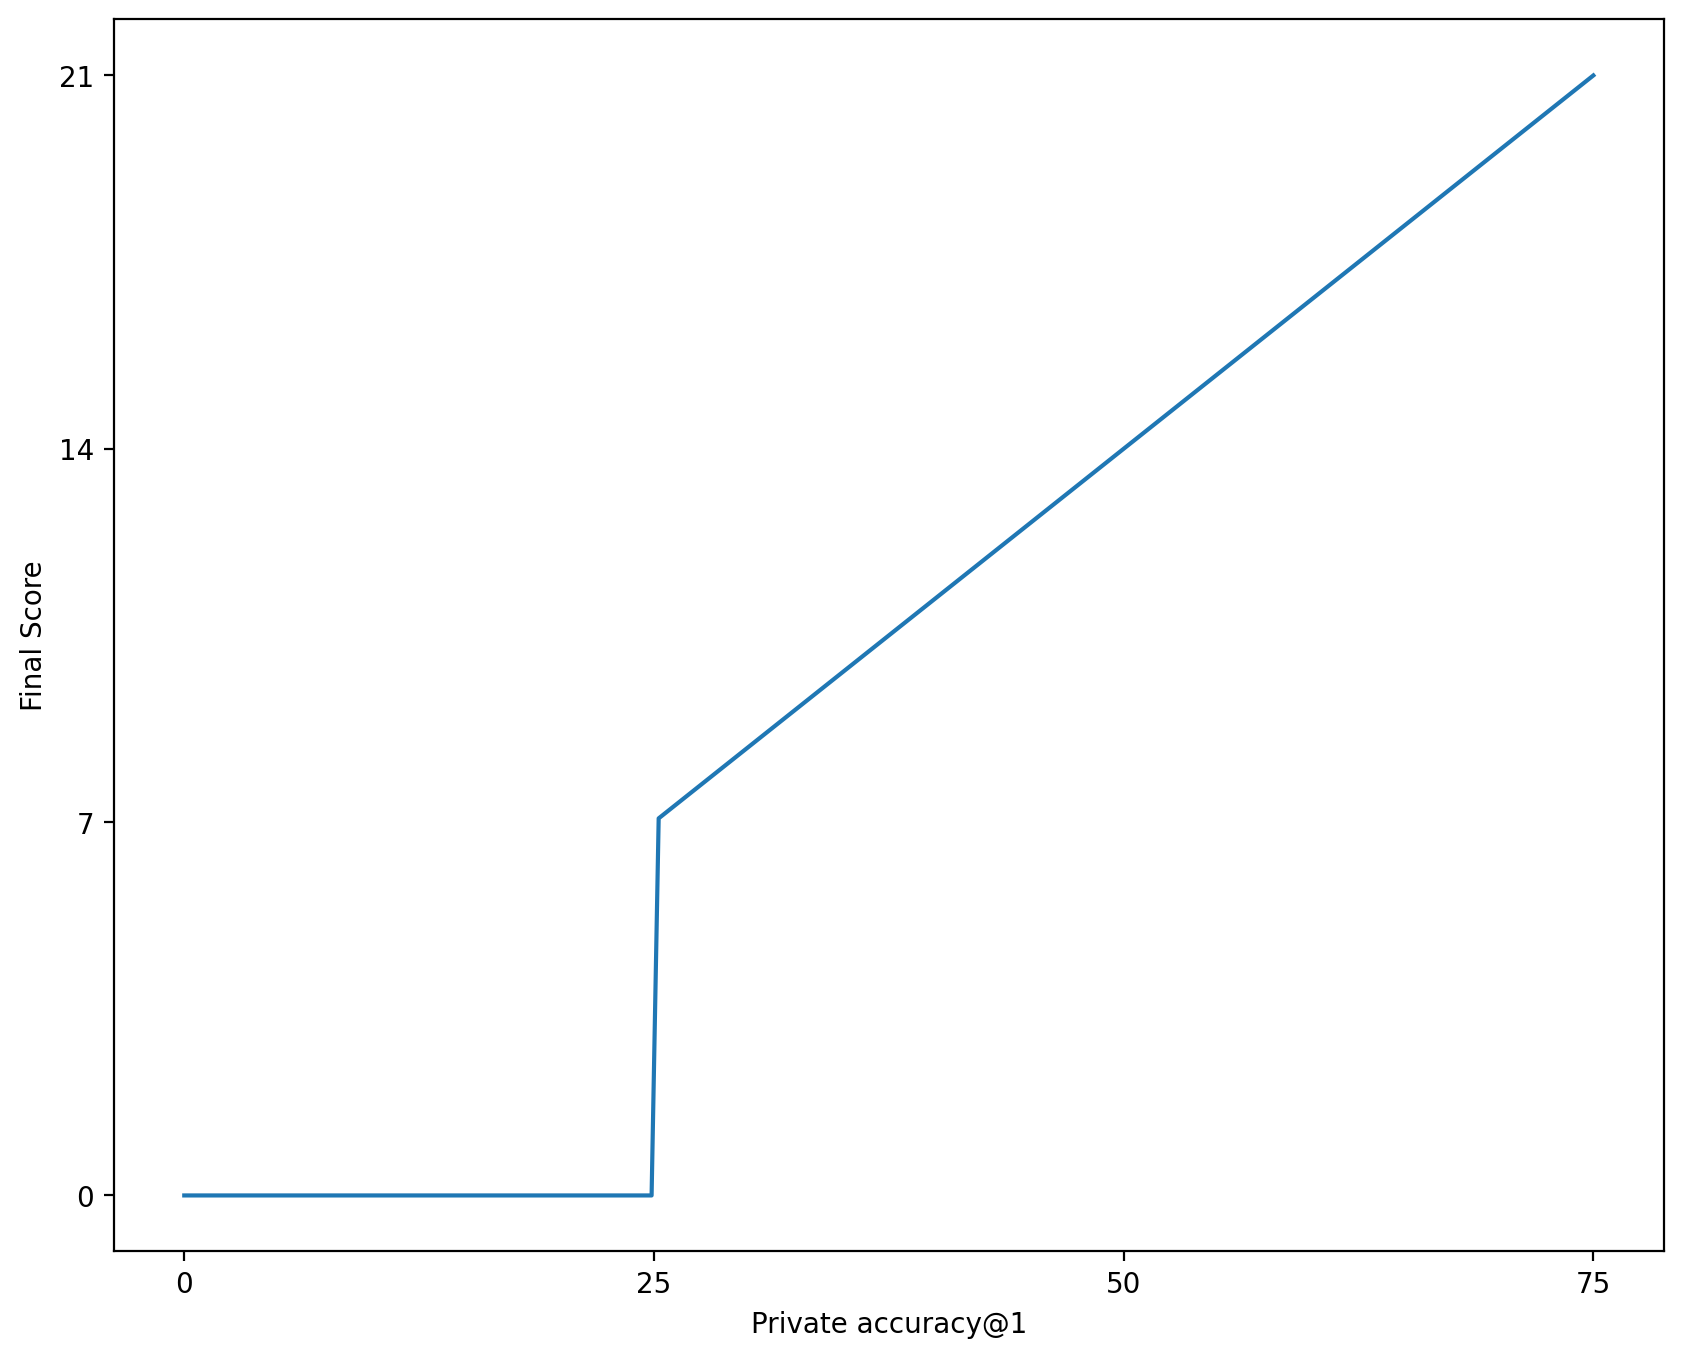

In [ ]:
score = np.linspace(0, 75, 200)

plt.figure(figsize=(10, 8))
plt.xlabel("Private accuracy@1")
plt.ylabel("Final Score")
plt.plot(score, score_hw2(score))
plt.yticks(score_hw2(np.array([0, 25, 50, 75])))
plt.xticks([0, 25, 50, 75])
plt.show()

--------

In [1]:
# Determine the locations of auxiliary libraries and datasets.
# `AUX_DATA_ROOT` is where 'tiny-imagenet.zip' is.

# Detect if we are in Google Colaboratory
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
if IN_COLAB:
    google.colab.drive.mount("/content/drive")

    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/temp")

    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"

    import sys
    sys.path.append(str(AUX_DATA_ROOT))
else:
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path(".")

Mounted at /content/drive


In [2]:
import os
from urllib.request import urlretrieve

def download_dataset(path, url='http://cs231n.stanford.edu/tiny-imagenet-200.zip'):
    dataset_name = 'tiny-imagenet-200'

    if os.path.exists(os.path.join(path, dataset_name, "val", "n01443537")):
        print("%s already exists, skipping download" % os.path.join(path, dataset_name))
        return
    elif not os.path.exists(os.path.join(path, 'tiny-imagenet-200' + ".zip")):
        print("Dataset doesn't exist or is broken, downloading it")
        urlretrieve(url, os.path.join(path, dataset_name + ".zip"))

    import zipfile
    with zipfile.ZipFile(os.path.join(path, 'tiny-imagenet-200' + ".zip"), 'r') as archive:
        archive.extractall()

    # # TEST DATASET CANT BE TRANSFORMED IN THIS WAY, SO IT'S SKIPPED
    # # move validation images to subfolders by class
    # val_root = os.path.join(".", dataset_name, "val")
    # with open(os.path.join(val_root, "val_annotations.txt"), 'r') as f:
    #     for image_filename, class_name, _, _, _, _ in map(str.split, f):
    #         class_path = os.path.join(val_root, class_name)
    #         os.makedirs(class_path, exist_ok=True)
    #         os.rename(
    #             os.path.join(val_root, "images", image_filename),
    #             os.path.join(class_path, image_filename))

    # os.rmdir(os.path.join(val_root, "images"))
    # os.remove(os.path.join(val_root, "val_annotations.txt"))


In [ ]:
# Put training and validation images in `./tiny-imagenet-200/train` and `./tiny-imagenet-200/val`:
download_dataset(AUX_DATA_ROOT)

In [5]:
# Your solution should be in the same directory and named solution.py
%load_ext autoreload
%autoreload 1

%aimport solution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# If `True`, will train the model from scratch and validate it.
# If `False`, instead of training will load weights from './checkpoint.pth'.
# When grading, we will test both cases.
DO_TRAIN = True

In [4]:
# Put training and validation images in `./tiny-imagenet-200/train` and `./tiny-imagenet-200/val`:
download_dataset(AUX_DATA_ROOT)

In [7]:
root_datasets = "./"

In [27]:
# Initialize dataloaders
train_dataloader = solution.get_dataloader(f"{root_datasets}/tiny-imagenet-200/", 'train')
val_dataloader   = solution.get_dataloader(f"{root_datasets}/tiny-imagenet-200/", 'val')
test_dataloader  = solution.get_dataloader(f"{root_datasets}/tiny-imagenet-200/", 'test')
# Initialize the raw model
model = solution.get_model()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
if DO_TRAIN:
    # Train from scratch
    optimizer = solution.get_optimizer(model)
    solution.train_on_tinyimagenet(train_dataloader, val_dataloader, model, optimizer)
else:
    # Download the checkpoint and initialize model weights from it
    import urllib
    import subprocess

    penalize = False

    # Get your link and checksum
    claimed_md5_checksum, google_drive_link = solution.get_checkpoint_metadata()

    # Use your link to download "checkpoint.pth"
    !pip install -U gdown
    !gdown --id {urllib.parse.urlparse(google_drive_link).path.split('/')[-2]} -O checkpoint.pth

    try:
        # Compute the actual checksum
        real_md5_checksum = subprocess.check_output(
            ["md5sum", "checkpoint.pth"]).decode().split()[0]
    except subprocess.CalledProcessError as err:
        # Couldn't download or the filename isn't "checkpoint.pth"
        print(f"Wrong link or filename: {err}")
        penalize = True
    else:
        # The trained checkpoint is different from the one submitted
        if real_md5_checksum != claimed_md5_checksum:
            print("Checksums differ! Late submission?")
            penalize = True

    if penalize:
        print("🔫 Prepare the penalizer! 🔫")

    # Finally load weights
    solution.load_weights(model, "./checkpoint.pth")

In [10]:
example_batch, example_batch_labels = next(iter(train_dataloader))

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [16]:
# Classify some validation samples
import torch
device = "cuda"

example_batch, example_batch_labels = next(iter(val_dataloader))
model.eval()
with torch.no_grad():
    _, example_predicted_labels = solution.predict(model, example_batch.to(device)).max(1)

print("Predicted class / Ground truth class")
for predicted, gt in list(zip(example_predicted_labels, example_batch_labels))[:15]:
    print("{:03d} / {:03d}".format(predicted, gt.argmax()))

Predicted class / Ground truth class
107 / 107
040 / 139
089 / 140
069 / 069
132 / 069
161 / 161
092 / 147
135 / 073
145 / 145
039 / 039
122 / 158
122 / 188
043 / 039
120 / 120
148 / 021


In [17]:
# Print validation accuracy
val_accuracy, _ = solution.validate(val_dataloader, model)
val_accuracy *= 100
assert 1.5 <= val_accuracy <= 100.0
print("Validation accuracy: %.2f%%" % val_accuracy)

Validation accuracy: 58.94%


In [18]:
map_classes = {class_idx: class_name for class_name, class_idx in train_dataloader.dataset.class_to_idx.items()}

In [19]:
from tqdm import tqdm
import numpy as np
import pandas as pd

In [22]:
# example real submission
device = 'cuda'
pred_dict = {}
pred_labels = []
img_names = []
model.eval()
for batch, img_name in tqdm(test_dataloader):
    with torch.no_grad():
        _, predicted_labels = solution.predict(model, batch.to(device)).max(1)
    pred_labels.extend(predicted_labels.tolist())
    img_names.extend(img_name)
for i, img_name in enumerate(img_names):
    pred_dict[img_name.split("/")[-1]] = map_classes[pred_labels[i]]

  0%|          | 0/157 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|██████████| 157/157 [00:15<00:00, 10.12it/s]


In [25]:
submission_df = pd.DataFrame(pred_dict.items(), columns=["id", "pred"])
submission_df.to_csv("random_submission.csv", index=False)